## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [3]:
# Check duplicates
data.duplicated().sum()

0

In [4]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Remove unwanted columns
data = data.drop(['customerID'],axis = 1)

In [7]:
# Explore all values
for c_name in data.columns:
    print('*'*40,c_name,'*'*40)
    print()
    print(set(data[c_name].tolist()))
    print()

**************************************** gender ****************************************

{'Male', 'Female'}

**************************************** SeniorCitizen ****************************************

{0, 1}

**************************************** Partner ****************************************

{'No', 'Yes'}

**************************************** Dependents ****************************************

{'No', 'Yes'}

**************************************** tenure ****************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}

**************************************** PhoneService ****************************************

{'No', 'Yes'}

**************************************** MultipleLines ******************************

In [8]:
# Data cleaning (Remove " " spaces)
data['TotalCharges'] = np.where(data['TotalCharges'] == ' ',np.nan,data['TotalCharges'])

In [9]:
# Corrected datatype
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
# Describe data
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# Value count of columns
for i in data.columns:
    print('*'*40,i,'*'*40)
    print()
    print(data[i].value_counts())
    print()

**************************************** gender ****************************************

gender
Male      3555
Female    3488
Name: count, dtype: int64

**************************************** SeniorCitizen ****************************************

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

**************************************** Partner ****************************************

Partner
No     3641
Yes    3402
Name: count, dtype: int64

**************************************** Dependents ****************************************

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

**************************************** tenure ****************************************

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

**************************************** PhoneService ****************************************

PhoneService
Yes    6361
No      682
Nam

## Missing value treatment

In [14]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# Filled missing values
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

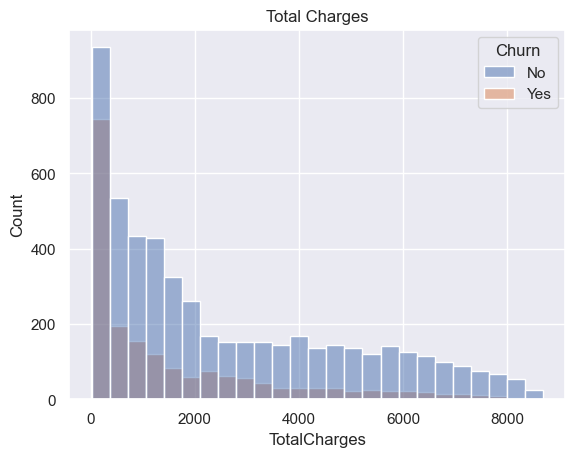

In [19]:
sns.histplot(data,x=data['TotalCharges'],hue='Churn')
plt.title("Total Charges")
plt.show()

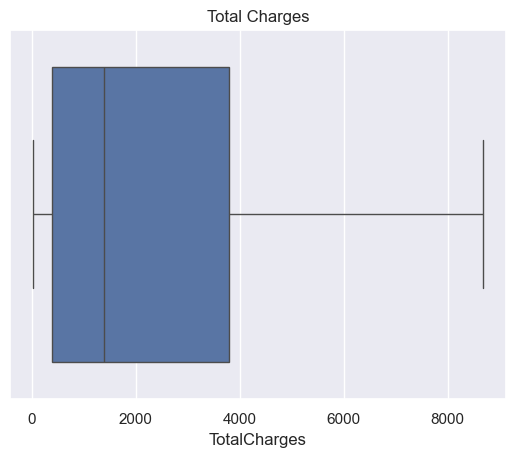

In [20]:
sns.boxplot(x=data['TotalCharges'])
plt.title("Total Charges")
plt.show()

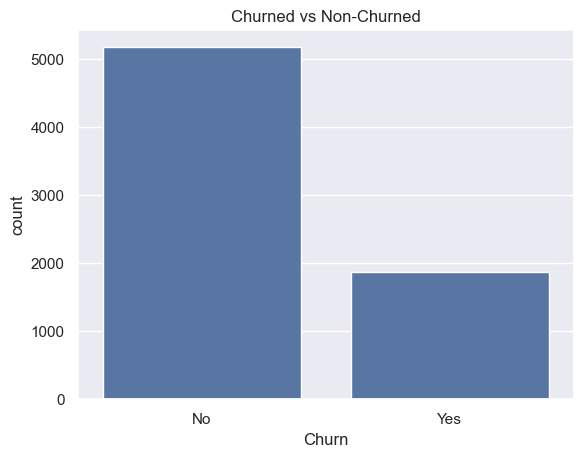

In [21]:
sns.countplot(x='Churn', data=data)
plt.title("Churned vs Non-Churned")
plt.show()

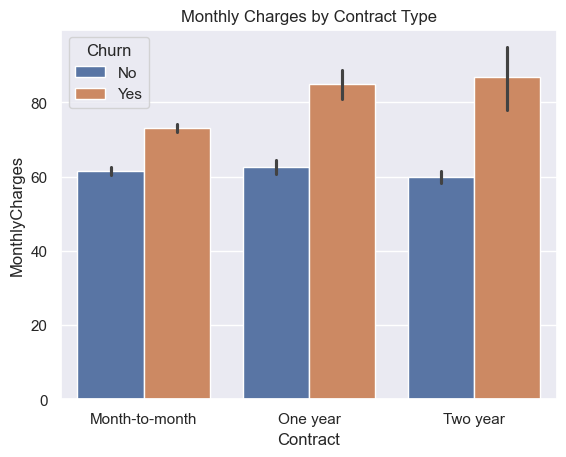

In [22]:
sns.barplot(x='Contract', y='MonthlyCharges', data=data,hue='Churn')
plt.title("Monthly Charges by Contract Type")
plt.show()

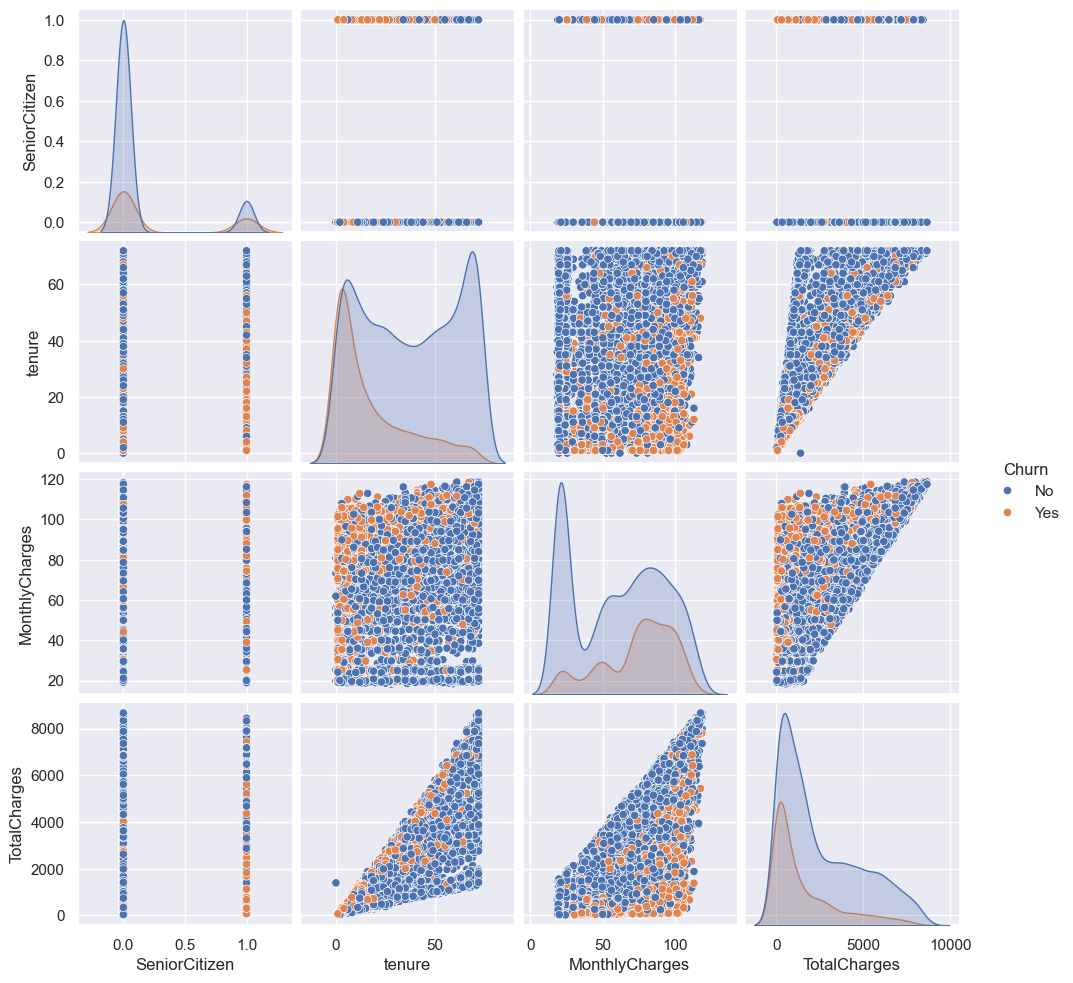

In [23]:
sns.pairplot(data,hue='Churn')
plt.show()

## Encoding

In [24]:
data = pd.get_dummies(data,columns=[ 'gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],drop_first=True)

In [25]:
data = data.applymap(lambda x : 1 if x is True else (0 if x is False else x))

In [26]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [27]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

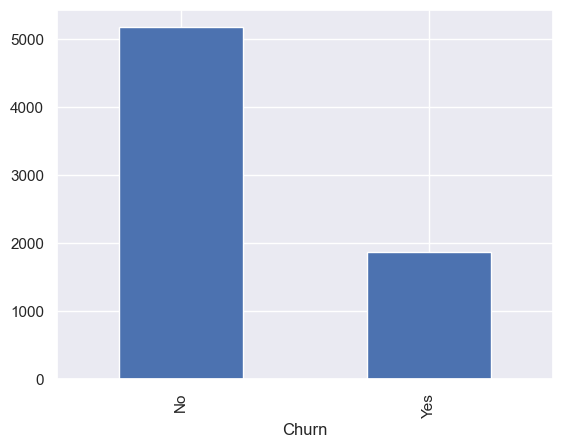

In [28]:
data['Churn'].value_counts().plot(kind='bar')

In [29]:
# import dtale
# dtale.show(data)

In [30]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Split into Dep. vs Indp. variables

In [31]:
# Splitting data into Dependent and Independent var
x = data.drop(['Churn'],axis = 1)
y = data['Churn']

## Balancing Data

In [32]:
# Balanced Dependent variable
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_over,y_over = ros.fit_resample(x,y)

In [33]:
print(y.value_counts())
print()
print(y_over.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     5174
Yes    5174
Name: count, dtype: int64


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x_over)
print(sc_x)

[[-0.48339129 -1.11415804 -1.31258852 ... -0.484912    1.19593016
  -0.51211238]
 [-0.48339129  0.26102772 -0.37370146 ... -0.484912   -0.83616923
   1.95269641]
 [-0.48339129 -1.07248575 -0.48110182 ... -0.484912   -0.83616923
   1.95269641]
 ...
 [-0.48339129 -1.11415804 -1.67809621 ... -0.484912   -0.83616923
   1.95269641]
 [-0.48339129  0.21935543  0.97226762 ... -0.484912    1.19593016
  -0.51211238]
 [-0.48339129 -1.11415804 -0.80849971 ... -0.484912    1.19593016
  -0.51211238]]


## Splitting into training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sc_x,y_over,random_state=11,test_size=0.25)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7761, 30), (2587, 30), (7761,), (2587,))

## Model building

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

## Predicted Model

In [38]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

## Evaluation matrix

In [39]:
from sklearn.metrics import accuracy_score
print("Training Accuracy :",accuracy_score(y_train,y_pred_train))
print("Testing Accuracy :",accuracy_score(y_test,y_pred_test))

Training Accuracy : 0.998067259373792
Testing Accuracy : 0.8921530730575957


In [40]:
# After k-fold method (Apply cross validation to the training)
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
print(training_accuracy)
print('*'*50)
print("Training Accuracy :",training_accuracy.mean())
print("Testing Accuracy :",accuracy_score(y_test,y_pred_test))

[0.86872587 0.89046392 0.89819588 0.87113402 0.86984536 0.8943299
 0.86726804 0.86340206 0.89561856 0.88015464]
**************************************************
Training Accuracy : 0.8799138239859889
Testing Accuracy : 0.8921530730575957
